In [2]:
!pip install fastbook --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.6 MB/s eta 0:00:00


In [3]:
from fastbook import *
urls = search_images_ddg('dog', max_images=100)
print(f'Number of URLs: {len(urls)}')
print(f'First URL {urls[0]}')

Number of URLs: 100
First URL https://wallpaperaccess.com/full/434966.jpg


In [4]:
download_url(urls[2], 'dog.jpg')

Path('dog.jpg')

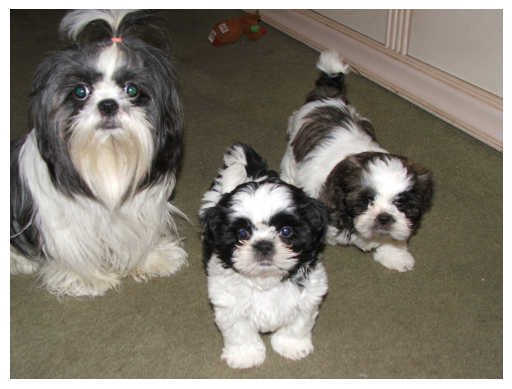

In [5]:
import cv2
import os
from matplotlib import pyplot as plt

img = cv2.imread('dog.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); # Recall OpenCV reads images as BGR
plt.axis('off');

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
def maybe_mkdir(path):
  if os.path.exists(path):
    pass
  else:
    os.mkdir(path)

from pathlib import Path
root = '/content/gdrive/My Drive/' # Don't change this
data_dirname = 'data1'
p = Path(root + data_dirname)
p.mkdir(exist_ok=True)
!ls -l "/content/gdrive/My Drive/data1"

Mounted at /content/gdrive
total 12
drwx------ 2 root root 4096 Sep  7 07:43 cat
drwx------ 2 root root 4096 Sep  7 07:43 dog
drwx------ 2 root root 4096 Sep  7 07:43 horse


In [7]:
classes = ['cat','dog','horse'] # DuckDuckGo search terms
count = 0

#urls = search_images_ddg('cat', max_images=100)
#urls = search_images_ddg('cdogat', max_images=100)
#print(f'Number of URLs: {len(urls)}')
#print(f'First URL {urls[0]}')

max_images = 100

for inx, category in enumerate(classes):
  print(category)
  folder = category
  path = p/folder
  dest = maybe_mkdir(path)
  urls = search_images_ddg(category,max_images=max_images)
  download_images(path, urls=urls, max_pics = max_images)


cat
dog
horse


In [8]:
for c in classes:
  print(c)
  files = [item for item in (p/c).iterdir() if item.is_file()]

  for img in files:
    image = cv2.imread(str(img))
    if image is None:
      print(f'Failed to load{img}, removing this image')
      os.remove(str(img))

cat
Failed to load/content/gdrive/My Drive/data1/cat/7736ed2f-fe88-4887-8c84-dd1369a236d7.jpg, removing this image
Failed to load/content/gdrive/My Drive/data1/cat/a74f1dab-cf70-4c97-b5d0-39c93b49e04c.jpg, removing this image
Failed to load/content/gdrive/My Drive/data1/cat/1d4a33eb-8aa6-4ba8-b83f-4eda679555fc.jpg, removing this image
dog
Failed to load/content/gdrive/My Drive/data1/dog/e6d009d0-2a6d-4f8a-8d16-19473e8bb98a.jpg, removing this image
Failed to load/content/gdrive/My Drive/data1/dog/07132d4a-dbe4-4763-9fde-5d707ab60bb4.JPG, removing this image
Failed to load/content/gdrive/My Drive/data1/dog/abb8051d-7bc7-4d51-b825-c2c8ce67102c.jpg, removing this image
Failed to load/content/gdrive/My Drive/data1/dog/d35a9a00-1384-4597-8050-e3c7e09bbaaa.jpg, removing this image
Failed to load/content/gdrive/My Drive/data1/dog/74d625ae-dcdf-4fa6-99e1-09c8d3fbf709.jpg, removing this image
horse
Failed to load/content/gdrive/My Drive/data1/horse/1239b829-32a5-4af7-868b-7dd37bf279e6.jpg, remov

In [9]:
# Task 03
from tensorflow.keras.applications.mobilenet import MobileNet

conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(120, 120, 3))
conv_base.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 60, 60, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 60, 60, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 60, 60, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 60, 60, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 60, 60, 32) 

In [10]:
#What is the expected shape of the input image?
# A: the expected input shape of the image of 120 x 120 as defined by the input_shape when we call the network
#What is the shape of the output of the model?
# The expected output shpe of the model is given in conv_pw_13 (Conv2D) where is is given as (3 x 3 x 1024) which is a 3 x 3 image with 1024 channels,
# The reason for the smaller image is that for each conv layers a new image is generated which is the image destrubuted to the subsequent layers this images' dim is reduced in the yx dims while inclreased in z(cahnnels). eventually the model compress the input 120x120 to a 3x3 grid of 1024 feature vectors. Each of these in the 3x3 grid can be directly traced back to the original 120x120 image, the receptrive view of the model is thereby 120/3 =40

#What happens to the output shape if you double the size of the input image?
# A: this is not always straight forward but in this case we get (7 x 7 x 1024) this is very much dependent on the kernel size, image proportions (width relative to height). With the image compressed to 7 x 7 x 1024 , when mapping back here the receptive field is  240/7 = 34. When we comprae thsi to the original image size the receptive field is actually reduced so net effect of doubling the image size is to decrease the effective receptive field of the model, if the number is below the total number of images in dataset the variable is called: mini-batch. One of the advantages is that we do not want to contantly copy data between the cpu and GPU, and therefor e load a batch of images on to the gpu then process them abn then return

#Can you guess what the None dimension is used for?
#A: The none dimension is used if you want to process more images at once. If you want to process 10 images at once it will be (10, 120, 120, 3) which is (batch_size, img_dim_y, img_dim_x, channels)

In [11]:
#   Task 4

import numpy as np
import keras.utils as image
from keras.applications.mobilenet import preprocess_input

# Pick first image of first class (i.e., cat)
filelist = [x for x in (p/classes[0]).iterdir() if x.is_file()]
img_path = filelist[1]
print(f"File path: {img_path}")

# Load image and preprocess it
img = image.load_img(img_path, target_size=(120, 120))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_preprocessed = preprocess_input(img_data.copy())

# Feed preprocessed image through CNN encoder to get a new feature representation
mobilenet_features = conv_base.predict(img_preprocessed)


File path: /content/gdrive/My Drive/data1/cat/1e7d5459-9c4d-4de0-bf05-c664d3e56eaa.jpg
1/1 [==============================] - 1s 528ms/step


minimum value before preprocessing 0.0 maximum value before preprocessing 255.0 minimum value after preprocessing -1.0 maximum value after preprocessing 1.0
img_preprocessed.shape : (1, 120, 120, 3)
mobilenet_features.shape : (1, 3, 3, 1024)
img_preprocessed.flatten().shape : (43200,)
mobilenet_features.flatten().shape : (9216,)
dimensionality reduction : 4.6875


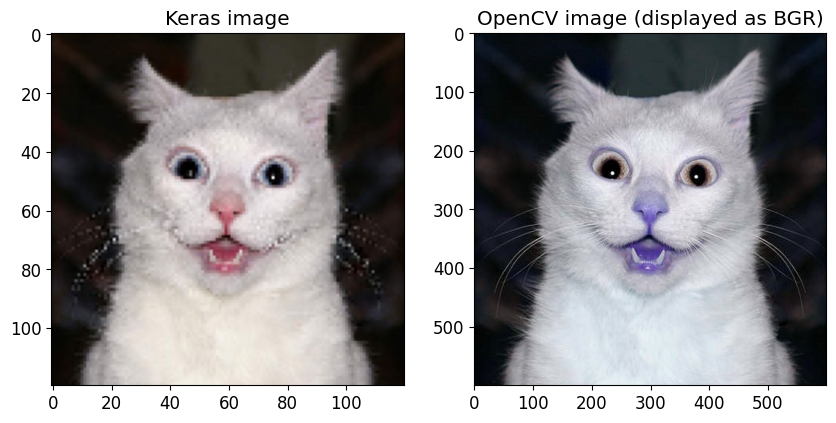

In [12]:
#question 4.1
# What is the range of the pixel values before and after preprocessing?
#Code to achieve this
min_bf = np.min(img_data)
max_bf = np.max(img_data)
min_aft = np.min(img_preprocessed)
max_aft = np.max(img_preprocessed)
print('minimum value before preprocessing', min_bf, 'maximum value before preprocessing',max_bf, 'minimum value after preprocessing', min_aft,'maximum value after preprocessing',max_aft)
# A: before the range of values was in the range of 0-255 before preprocessing, after is in the range of -1, 1
#So what formula do you think is used to pre-process the pixel values?
# A: the formular used for converting 0-255 to -1-1 is: y = x/127.5 -1# overall is is just a proportion calulating /non linear transformation
#What is the order of the color channels? (you could compare with cv2.imread, which we know reads images as BGR)
# A: the order of the color channels is RGB, therefore be sure when loading with opencv to shift the color channels
import cv2
import matplotlib.pyplot as plt
img_opencv = cv2.imread(str(img_path))
plt.figure(figsize=(10,6))
plt.subplot(121); plt.imshow(img_data.squeeze()/255); plt.title('Keras image')
plt.subplot(122); plt.imshow(img_opencv); plt.title('OpenCV image (displayed as BGR)')
#W4 hat is the size of the input image (img_data after calling np.expand_dims)? 1, 120, 120, 3
# 5 What is the size of the calculated feature representation (mobilenet_features)? 1, 3, 3, 1024
#6 So what is the reduction in dimensionality after feature extraction?initla image feature vector size (120*120*3)= 43200 and (3*3*1024)=9216 teh reduction indimentionality is then 43200/9216

print('img_preprocessed.shape :',img_preprocessed.shape)
print('mobilenet_features.shape :',mobilenet_features.shape)
print('img_preprocessed.flatten().shape :',img_preprocessed.flatten().shape)
print('mobilenet_features.flatten().shape :',mobilenet_features.flatten().shape)
print('dimensionality reduction :',img_preprocessed.flatten().shape[0]/mobilenet_features.flatten().shape[0])


1/1 [==============================] - 0s 48ms/step
Feature map size: 60x60x32
i 0 __ [[-1.6781856e-12 -1.7478098e-12 -1.7941254e-12 ... -1.7773338e-12 -1.7159994e-12 -1.3774952e-12]
 [-1.5943756e-12 -1.6459348e-12 -1.7453192e-12 ... -1.7143728e-12 -1.6196254e-12 -1.3337638e-12]
 [-1.6168126e-12 -1.6166493e-12 -1.6301166e-12 ... -1.6167379e-12 -1.6235573e-12 -1.3699070e-12]
 ...
 [-1.8881854e-12 -1.8655648e-12 -1.8203082e-12 ... -1.8339117e-12 -1.8677243e-12 -1.5894647e-12]
 [-1.8822114e-12 -1.8530147e-12 -1.8000835e-12 ... -1.8295751e-12 -1.8679203e-12 -1.5790812e-12]
 [-1.0110495e-12 -1.0006364e-12 -9.8741588e-13 ... -9.8008754e-13 -9.9888685e-13 -1.0046394e-12]]
i 1 __ [[ 0.0689785   0.06472528  0.02368941 ...  0.07988831  0.0886827   0.05666796]
 [ 0.12554759  0.14744028  0.09236796 ...  0.10887554  0.14082576  0.08681939]
 [ 0.15530623  0.17803352  0.1181948  ...  0.17986315  0.16979288  0.10018095]
 ...
 [ 0.00219348  0.019218    0.04807002 ...  0.04948331 -0.01496161 -0.03470106

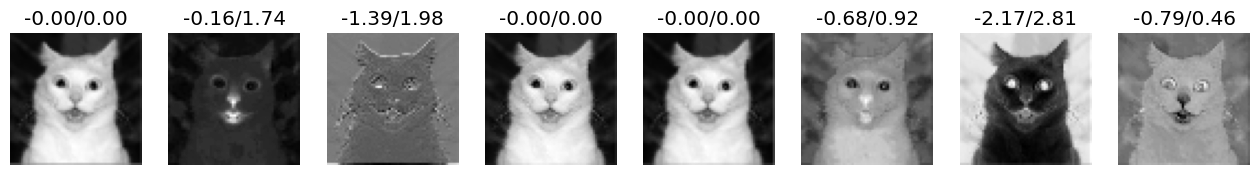

In [14]:
#Task 5
from keras import Model

def show_feature_maps_from_layer(layer_name='conv1',img=img_preprocessed):
  dummy_model = Model(inputs=conv_base.input, outputs=conv_base.get_layer(layer_name).output)
  out = (dummy_model.predict(img)).squeeze()

  height = out.shape[0]
  width = out.shape[1]
  num_channels = out.shape[2]
  print(f'Feature map size: {height}x{width}x{num_channels}')

  plt.figure(figsize=(16,16))
  for i in range(8): # only display first 8 feature maps (channels)
    f = out[:,:,i]
    print('i', i, '__', f)
    plt.subplot(1,8,i+1)
    plt.imshow(f,cmap='gray')
    plt.axis('off')
    plt.title("{0:.2f}".format(f.min()) + "/" + "{0:.2f}".format(f.max()))

# See conv_base.summary() for complete list of layer names
show_feature_maps_from_layer(layer_name='conv1')


1/1 [==============================] - 0s 108ms/step
Feature map size: 30x30x64
i 0 __ [[-1.22563457e+01 -1.95146904e+01 -1.09889317e+01 -1.22072482e+00 -4.61007977e+00 -4.10009480e+00 -3.25515580e+00 -5.51803541e+00 -1.01633301e+01 -1.17047338e+01 -3.80462432e+00 -3.95263910e-01
   0.00000000e+00 -2.60174847e+00 -4.00616264e+00 -8.42700386e+00 -2.31272907e+01 -4.52862072e+00 -1.93987632e+00 -4.54645824e+00 -9.57922745e+00 -9.01512241e+00 -2.34658170e+00 -1.19274359e+01
  -2.25879688e+01 -5.20354462e+01 -3.56390495e+01 -5.62556171e+00 -1.91143811e+00 -3.19980025e+00]
 [-1.47534227e+00 -9.61097050e+00 -2.20830917e+01 -8.00132084e+00 -3.60506845e+00 -5.13675594e+00 -7.36351681e+00 -6.90267897e+00 -1.49987755e+01 -4.37003374e+00 -3.23393083e+00 -8.36667895e-01
  -3.14025849e-01 -3.55152726e+00 -5.01424265e+00 -4.57549572e+00 -1.88221245e+01 -1.10828753e+01 -1.15184557e+00 -7.35508442e+00 -1.03620052e+01 -1.48677568e+01 -6.43387318e+00 -6.79186964e+00
  -5.47255630e+01 -6.39956169e+01 -1.6

1/1 [==============================] - 0s 416ms/step
Feature map size: 3x3x1024
i 0 __ [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 1 __ [[-0.70663595 -1.6191689  -1.0723252 ]
 [-0.82396686 -1.8545558  -1.2952609 ]
 [ 0.          0.          0.        ]]
i 2 __ [[-2.3878503  -4.9774923  -1.7110765 ]
 [-3.8428826  -7.6995034  -2.598494  ]
 [-1.7890264  -3.789052   -0.55613047]]
i 3 __ [[-0.69468904 -0.8939364  -0.91714144]
 [-0.6383018  -0.7624418  -0.8705852 ]
 [-0.8341392  -0.8297906  -1.0119326 ]]
i 4 __ [[0.07167155 0.11788511 0.        ]
 [0.11530957 0.16768268 0.        ]
 [0.         0.         0.        ]]
i 5 __ [[-0.24500287 -0.579521   -0.09629541]
 [-0.5471643  -1.030485   -0.06069303]
 [-0.34665948 -0.80549777 -0.11654601]]
i 6 __ [[ -5.2721987  -7.732135   -5.4083385]
 [ -7.830882  -11.18192    -8.121572 ]
 [ -5.278363   -7.730381   -5.541776 ]]
i 7 __ [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


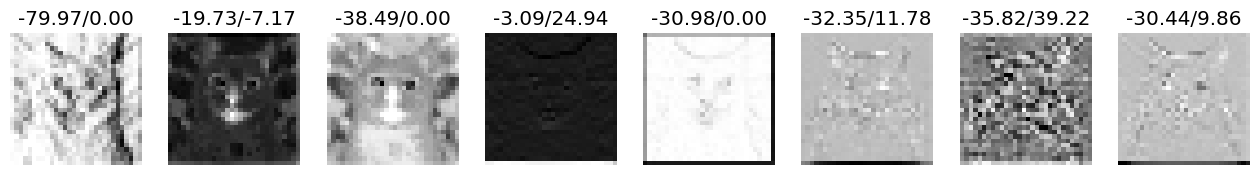

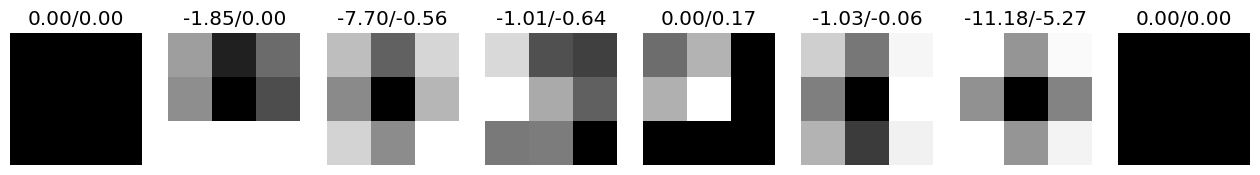

In [15]:
show_feature_maps_from_layer(layer_name='conv_dw_2')
show_feature_maps_from_layer(layer_name='conv_dw_13')
#print(show_feature_maps_from_layer(layer_name='conv_dw_13'))

In [14]:
#Notice that the height and width of the feature maps become smaller and smaller as we move deeper into the network. Why do you think that is?
# A: The reason as to why the feature map dimensions become smaller and smaller as we get lower into the network is that we use convolution throughout the network dependent on the kernel size the reduction of the feature maps is reduced by. This opccures because when we perform the covolution between the kernel and the image , the center location of the kerneæ relative to  the image i replaced by the new value which is a result of the covolution. As this is the center pixel the out edge pixels are not replaced and is therefore not added to the feature maps, this produces and significant reduxction on the size of the feature maps. Simply because of not including the edge pixels
#If the last feature map is only three pixels high and three pixels wide (shape is 3x3x1024), how can the neural network know that there is a cat in the image, i.e, where i
# s that information encoded in the feature map?
# A: There is different patterns which are typuical for each of the object classes, this is encoded through a pattern of values which are representative of the classes.
# learn patterns that are typical for different object classes, and then look through the image to recognize those classes and take the decision.
# During the forward pass of a CNN, the input image is convolved with one or more filters to produce multiple feature maps. Each feature map corresponds to a specific filter and represents the response of that filter to the input image. Each element in the feature map represents the activation of a specific neuron in the network, and its value represents the degree to which the corresponding feature is present in the input image.
#
# which can be concatenated to create a final feature map that captures multiple aspects of the input data.

In [16]:
#task 06
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
generator = datagen.flow_from_directory(str(p), # this is where you specify the path to the main data folder
                                        target_size=(120,120),
                                        color_mode='rgb',
                                        batch_size=8,
                                        class_mode='categorical',
                                        shuffle=True)


Found 552 images belonging to 3 classes.


In [17]:
print('generator:',generator.class_indices)
print('your\'s:',dict((class_name,class_index) for class_index,class_name in enumerate(classes)))

generator: {'cat': 0, 'dog': 1, 'horse': 2}
your's: {'cat': 0, 'dog': 1, 'horse': 2}


In [18]:
inputs, labels = generator.next()
#questions
# What is variable inputs? (Hint: look at the shape)
print(inputs.shape)
# A> we see that it is a mini batch  with 8 RGB images of the sizw 120x120
# What is variable labels?
print(labels.shape)
# rgst is the labels for the images the labeks are one hot encoded with a size of 3 because o the three classes here 1 is then evident at a location in the vector representing the classes vwhile the rest remain 0so one label vector for each image
# How does the image generator know where the images are stored?
# How does the image generator know the class of each image?
# How does the image generator know the class of each image?
#what is shuffle
# A: the rearrangement of the images

#

(8, 120, 120, 3)
(8, 3)


In [19]:
# Task 6.2
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

train_generator = datagen.flow_from_directory(str(p),
                                        target_size=(120,120),
                                        color_mode='rgb',
                                        batch_size=8,
                                        class_mode='categorical',
                                        shuffle=True,
                                        subset='training')
validation_generator = datagen.flow_from_directory(str(p),
                                        target_size=(120,120),
                                        color_mode='rgb',
                                        batch_size=8,
                                        class_mode='categorical',
                                        shuffle=True,
                                        subset='validation')

Found 444 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


In [20]:
#Questions 6 2
#How does each of the two generators know if it should produce training or validation images?¨
# THisd is given by the subset variable which choose if this is a training or validation dataset
#What is the validation percentage in this example?
percent = len(validation_generator)/len(train_generator)
print(percent)
#the percentage is 25%

0.25


1/1 [==============================] - 0s 43ms/step


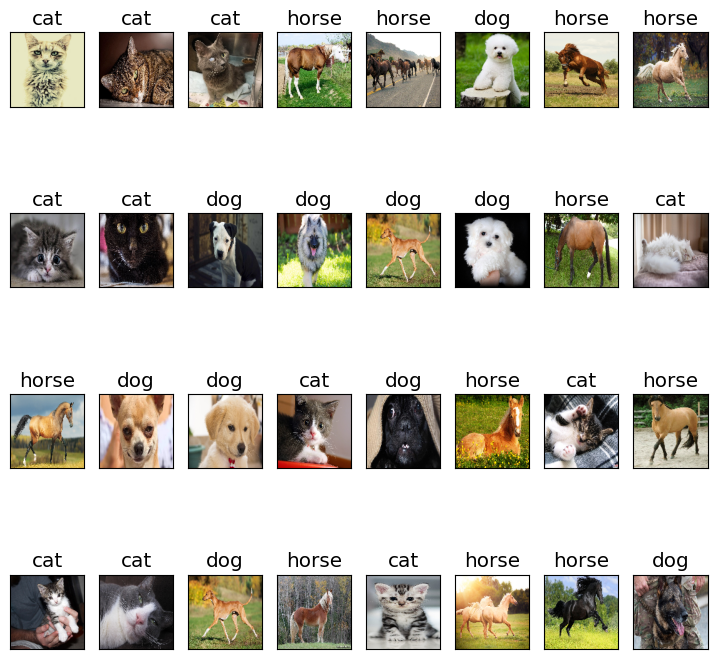

In [21]:
# Task07
def extract_features(generator):
  generator.reset()
  raw_pixel_features_list = []
  mobilenet_features_list = []
  labels_list = []
  batch_index = 0
  while batch_index <= generator.batch_index:
    # Load mini-batch
    raw_pixels, labels = generator.next()

    # Run through MobileNet encoder
    mobilenet_features = conv_base.predict(raw_pixels) # This is where we apply the CNN

    # Vectorize images
    bs,h,w,c = raw_pixels.shape
    raw_pixels = np.reshape(raw_pixels,(bs,h*w*c)) # vectorize

    # Vectorize MobileNet features
    bs,h,w,c = mobilenet_features.shape
    mobilenet_features = np.reshape(mobilenet_features,(bs,h*w*c)) # vectorize

    # Convert one-hot encoding to class index
    labels = np.argmax(labels,axis=1)

    # Save in lists
    for i in range(bs):
      raw_pixel_features_list.append(raw_pixels[i])
      mobilenet_features_list.append(mobilenet_features[i])
      labels_list.append(labels[i])

    batch_index = batch_index + 1

  # Convert lists to numpy arrays
  raw_pixel_features = np.asarray(raw_pixel_features_list)
  mobilenet_features = np.asarray(mobilenet_features_list)
  labels = np.asarray(labels_list)

  return raw_pixel_features, mobilenet_features, labels

train_features_raw, train_features_mobilenet, train_labels = extract_features(train_generator)
validation_features_raw, validation_features_mobilenet, validation_labels = extract_features(validation_generator)
def denormalize(input_img):
  '''
    input_img has intensities in range -1 to 1 (after Keras MobileNet preprocessing)
    output_img has intensities in range 0 to 1 (float)
  '''
  output_img = (input_img+1) / 2
  return output_img

def vec2img(img_as_vec,output_shape=(120,120,3)):
  '''
    img_as_vec is a vectorized color image
    output_shape is the desired output image shape
  '''
  img_as_array = np.reshape(img_as_vec,output_shape)
  return img_as_array

plt.figure(figsize=(9,9))
for i in range(32):
  # reshape feature vector into 120x120x3 array (image) and de-normalize intensities to range 0 to 1.
  img = vec2img(validation_features_raw[i,:])
  img = denormalize(img)
  plt.subplot(4,8,i+1)
  plt.imshow(img)
  plt.xticks([]), plt.yticks([])
  plt.title(classes[int(validation_labels[i])])


In [21]:
# Questions task 7
# What is the shape of train_features_raw?
print(train_features_raw.shape)
# A: The shape is (184, 43200) which means we have 184 samples, with feature vectors of 43200, the number of samples depends on how many times we have run the command
#What is the shape of train_features_mobilenet?
print(train_features_mobilenet.shape)
#A: the shape is (184, 9216)
#What is the difference between train_features_raw and train_features_mobilenet, i.e., what do they represent?
# A:  the train_features raw is the raw pixels. Trasin features mobile net are the features encoded using mobileNet
#What is the shape of train_labels?
print(train_labels.shape)
# A: This is of 184
#How many training samples do we have, and how many validation samples?
print(validation_labels.shape)
# A: shape is 45

(407, 43200)
(407, 9216)
(407,)
(101,)


In [22]:
'''
Your task is to train a K-NN classifier on the training set, and evaluate the performace on the validation set by calculating the accuracy (and remember to calculate the accuracy on the validation set, not the training set!).

First solve the task using the raw pixels as features:

# Training set
train_features_raw, train_labels

# Validation set
validation_features_raw, validation_labels
Then solve the same task using the MobileNet features:

# Training set
train_features_mobilenet, train_labels

# Validation set
validation_features_mobilenet, validation_labels
Compare the results and explain the difference.

You are on your own here, but you don't have to implement K-NN yourself
'''
from sklearn import neighbors
# Train on training set with k = 5
clf = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree').fit(train_features_raw,train_labels)
# What is the Ball Tree in KNN algorithm?
#KD Tree and Ball Tree - KNN Algorithm
#Similar to KD Tree, in the Ball Tree the total space of training data is divided into multiple balls (circular blocks), and the distance of testing data is calculated only with the training points in that block instead of calculating with all the training data points.
# Predict on validation set
pred = clf.predict(validation_features_raw)

# Accuracy
num_correct = len(np.where(pred==validation_labels)[0])
num_total = len(validation_labels)
accuracy = num_correct / num_total
print(accuracy)

0.6633663366336634


In [23]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree').fit(train_features_mobilenet,train_labels)

# Predict on validation set
pred = clf.predict(validation_features_mobilenet)

# Accuracy
num_correct = len(np.where(pred==validation_labels)[0])
num_total = len(validation_labels)
accuracy = num_correct / num_total
print(accuracy)

0.9801980198019802


In [24]:
#Task 09
mobilenet_full = MobileNet(weights='imagenet',
                      include_top=True,
                      input_shape=(224, 224, 3))
mobilenet_full.summary()

#Questions 9.1
'''
Inspect the printout above.

Can you identify the convolutional base of this network? (Compare to the conv_base model we used earlier.)
A: the convolutional base goes until layers 13/conv_pw_13. This is all the layers up until this layer

All layers beyond the convolutional base represent the classifier (or decoder). How many classes are there?
A: based on this layer " conv_preds (Conv2D)         (None, 1, 1, 1000) " we can see that there is a 1000 classes

So what is the size of the output of the model?
A: based on the out of the final layer  predictions (Activation)    (None, 1000)              0   we see that we get an one-hot encoded vector of size (None, 1000)
Can you guess how we should interpret the output of model?
A: The out put should be interpreted as the (None = batch_size, number of classes) where our batch size is the number of images we predict in each mini batch. Each element in the matrix represent a probability that the image belongs to each class  as predicted by the network
The input size must be 224 by 224 pixels (you can verify for yourself). Why do you think that is?

A:  A neural network is essentially a bunch of matrix-vector multiplications (plus a few more operations...).
If the sizes of the matrices and vectors do not match, the math doesn't work. This is the most likely explanation,
but in fact changing the input image size shouldn't cause problems here because global_average_pooling2d_1
effectively removes the 7x7 grid, which is where we could get into trouble with matrix/vector size mismatches...
I guess changing the input size just doesn't work in practise, in the sense that the math works, but the network doesn't perform that well (i.e., accuracy is low).
'''

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

'\nInspect the printout above.\n\nCan you identify the convolutional base of this network? (Compare to the conv_base model we used earlier.)\nA: the convolutional base goes until layers 13/conv_pw_13. This is all the layers up until this layer\n\nAll layers beyond the convolutional base represent the classifier (or decoder). How many classes are there?\nA: based on this layer " conv_preds (Conv2D)         (None, 1, 1, 1000) " we can see that there is a 1000 classes\n\nSo what is the size of the output of the model?\nA: based on the out of the final layer  predictions (Activation)    (None, 1000)              0   we see that we get an one-hot encoded vector of size (None, 1000)\nCan you guess how we should interpret the output of model?\nA: The out put should be interpreted as the (None = batch_size, number of classes) where our batch size is the number of images we predict in each mini batch. Each element in the matrix represent a probability that the image belongs to each class  as pr

In [25]:
'''
So, how do we modify and re-train MobileNet to work on our own data? First of all, we don't want to train CNNs from scratch, since this could take days. Secondly, we need to modify the network architecture to output three class labels (cat, dog, horse) instead of 1000.

The main hypothesis underlying transfer learning is that the network weights learned in the convolutional layers (i.e., the encoder) are generic and need little or no fine-tuning to work on other data sets or tasks. So in practice, we just need to replace and re-train the last layers (i.e., the decoder) of a pre-trained network.

So let's take our convolutional base (encoder) and put a simple neural network classifier (decoder) on top of it. Your task is to figure out what the value of variable N should be.
'''

N = 3 # N should be three as we have three classes in our data
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model

# Add new top layer
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x) #dense layer
preds = Dense(N,activation='softmax')(x) #final layer with softmax activation

# Specify model
model = Model(inputs=conv_base.input, outputs=preds)
'''
What should N be in the above code block?
A: N should be three as we have three classes in our data
Re-run the code block with the correct N.
A:

What does GlobalAveragePooling2D do?
A: subsequent to our conv layer there is a pooling layer which which contributes to extracting features by performinignthe poolign operation. this is like the conv a kernel based operation, however here we take the average of the values covered by the kernel(no multiplication of the kernel vals and images) and this value is hte representative of the  location of the kernel center pixel in the new feature map
The idea is to generate one feature map for each corresponding category of the classification task in the last mlpconv layer. Instead of adding fully connected layers on top of the feature maps, we take the average of each feature map, and the resulting vector is fed directly into the softmax layer.
'''




'\nWhat should N be in the above code block?\nA: N should be three as we have three classes in our data\nRe-run the code block with the correct N.\nA:\n\nWhat does GlobalAveragePooling2D do?\nA: subsequent to our conv layer there is a pooling layer which which contributes to extracting features by performinignthe poolign operation. this is like the conv a kernel based operation, however here we take the average of the values covered by the kernel(no multiplication of the kernel vals and images) and this value is hte representative of the  location of the kernel center pixel in the new feature map\n'

In [26]:
for i,layer in enumerate(model.layers):
  layer_name = layer.name
  layer_type = layer.__class__.__name__
  input_shape = layer.input_shape
  print(f"Layer {i} has name {layer_name} and type {layer_type}, and its input shape is {input_shape}")

# Or use the summary function:
model.summary()

total_num_layers = len(model.layers)
num_base_layers = len(conv_base.layers)
print(f"Total number of layers is {total_num_layers}")
print(f"Number of pretrained base layers is {num_base_layers}")

for layer in model.layers[:num_base_layers]:
    layer.trainable=False
for layer in model.layers[num_base_layers:]:
    layer.trainable=True

Layer 0 has name input_1 and type InputLayer, and its input shape is [(None, 120, 120, 3)]
Layer 1 has name conv1 and type Conv2D, and its input shape is (None, 120, 120, 3)
Layer 2 has name conv1_bn and type BatchNormalization, and its input shape is (None, 60, 60, 32)
Layer 3 has name conv1_relu and type ReLU, and its input shape is (None, 60, 60, 32)
Layer 4 has name conv_dw_1 and type DepthwiseConv2D, and its input shape is (None, 60, 60, 32)
Layer 5 has name conv_dw_1_bn and type BatchNormalization, and its input shape is (None, 60, 60, 32)
Layer 6 has name conv_dw_1_relu and type ReLU, and its input shape is (None, 60, 60, 32)
Layer 7 has name conv_pw_1 and type Conv2D, and its input shape is (None, 60, 60, 32)
Layer 8 has name conv_pw_1_bn and type BatchNormalization, and its input shape is (None, 60, 60, 64)
Layer 9 has name conv_pw_1_relu and type ReLU, and its input shape is (None, 60, 60, 64)
Layer 10 has name conv_pad_2 and type ZeroPadding2D, and its input shape is (None, 

In [30]:
from tensorflow.keras import optimizers

# Set up optimizer
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=1e-6)
sgd_optimizer = optimizers.Adam(learning_rate=lr_schedule)

# Compile model - make it trainable
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train = train_generator.n//train_generator.batch_size # Number of mini-batches per epoch (training)
step_size_val = validation_generator.n//validation_generator.batch_size # Number of mini-batches per epoch (validation)
for i,layer in enumerate(model.layers):
  layer_name = layer.name
  layer_type = layer.__class__.__name__
  input_shape = layer.input_shape
  print(f"Layer {i} has name {layer_name} and type {layer_type}, and its input shape is {input_shape}")

# Or use the summary function:
model.summary()
# Train model for 10 epochs
history = model.fit_generator(generator=train_generator,
                   validation_data=validation_generator,
                   validation_steps=step_size_val,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Layer 0 has name input_1 and type InputLayer, and its input shape is [(None, 120, 120, 3)]
Layer 1 has name conv1 and type Conv2D, and its input shape is (None, 120, 120, 3)
Layer 2 has name conv1_bn and type BatchNormalization, and its input shape is (None, 60, 60, 32)
Layer 3 has name conv1_relu and type ReLU, and its input shape is (None, 60, 60, 32)
Layer 4 has name conv_dw_1 and type DepthwiseConv2D, and its input shape is (None, 60, 60, 32)
Layer 5 has name conv_dw_1_bn and type BatchNormalization, and its input shape is (None, 60, 60, 32)
Layer 6 has name conv_dw_1_relu and type ReLU, and its input shape is (None, 60, 60, 32)
Layer 7 has name conv_pw_1 and type Conv2D, and its input shape is (None, 60, 60, 32)
Layer 8 has name conv_pw_1_bn and type BatchNormalization, and its input shape is (None, 60, 60, 64)
Layer 9 has name conv_pw_1_relu and type ReLU, and its input shape is (None, 60, 60, 64)
Layer 10 has name conv_pad_2 and type ZeroPadding2D, and its input shape is (None, 

<ipython-input-30-401d387af6c4>:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10
50/50 [==============================] - 38s 617ms/step - loss: 1.2739 - accuracy: 0.8045 - val_loss: 0.4527 - val_accuracy: 0.8958
Epoch 2/10
50/50 [==============================] - 30s 595ms/step - loss: 0.4031 - accuracy: 0.9098 - val_loss: 0.4511 - val_accuracy: 0.8958
Epoch 3/10
50/50 [==============================] - 32s 648ms/step - loss: 0.3916 - accuracy: 0.9123 - val_loss: 0.4220 - val_accuracy: 0.9062
Epoch 4/10
50/50 [==============================] - 27s 540ms/step - loss: 0.3997 - accuracy: 0.9098 - val_loss: 0.4220 - val_accuracy: 0.9062
Epoch 5/10
50/50 [==============================] - 29s 579ms/step - loss: 0.3929 - accuracy: 0.9123 - val_loss: 0.4408 - val_accuracy: 0.9062
Epoch 6/10
50/50 [==============================] - 34s 678ms/step - loss: 0.4018 - accuracy: 0.9098 - val_loss: 0.4326 - val_accuracy: 0.9062
Epoch 7/10
50/50 [==============================] - 27s 538ms/step - loss: 0.3876 - accuracy: 0.9123 - val_loss: 0.4510 - val_accuracy: 0.8958

In [ ]:
'''

kemotherapy as a risk factor for DNOG model? hwo do i distinquish between the if the effect is caused by chemo or radiotherapy
Look at the outputs of the training.

What is the difference between 'loss' and 'val_loss'?:
'loss ' is the traiing loss so the loss is the lowering error as a response to the change of weight values using the training data. Val loss represents the error after sending the validation dataset, which is used for hp tunings, is sent through the model.
What is the difference between 'accuracy' and 'val_accuracy'?
the  differnce between is that one is based on the training data  while the  the val accuracu is the accurace of the model predictions based on the validation dataset
Do they behave the same, or do they behave differently? Try to explain what you see.
i see an increasse in accuracy and a decrease in loss which is what we expct to see when the model is trainign and updating paramweters to be suitable for the task at hand.
'''

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


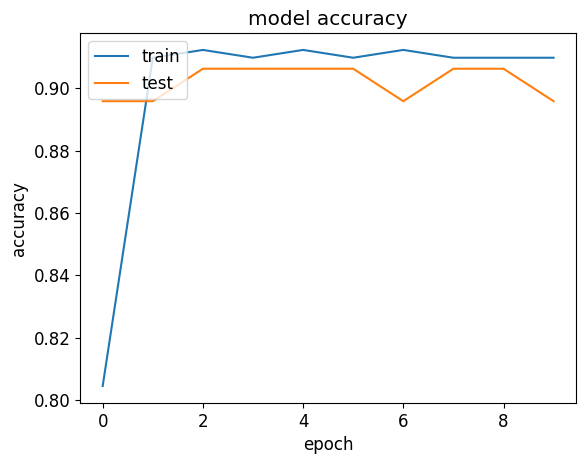

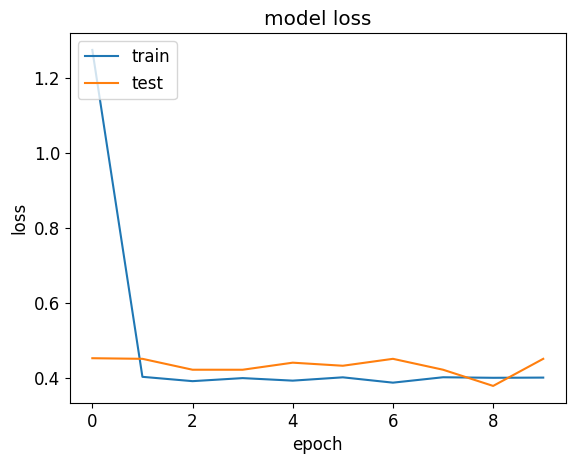

In [31]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

File path: /content/gdrive/My Drive/data1/cat/c0b3d8e2-427a-4253-a594-0436ae60c9c2.jpg
(1, 120, 120, 3) -1.0 1.0
1/1 [==============================] - 1s 533ms/step
[1.0000000e+00 1.8720621e-08 2.1204240e-14]
The image displays a cat!


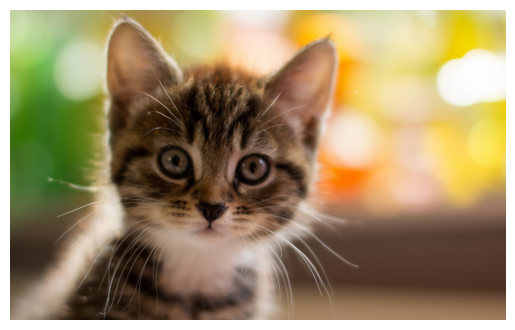

In [32]:
#Task 10

import cv2

# Pick first image of first class
filelist = [x for x in (p/classes[0]).iterdir() if x.is_file()]
img_path = str(filelist[1])
print(f"File path: {img_path}")

# Remember to convert to RGB
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.axis('off');

img = cv2.resize(img, (120, 120))
img = (img[...,::-1].astype(np.float32))
img /= 127.5
img -= 1.
img = np.expand_dims(img,0)
print(img.shape,img.min(),img.max())


class_probabilities = model.predict(img)[0]
print(class_probabilities)
# pick class with highest probability
class_index = (-class_probabilities).argsort()[0]
print(f'The image displays a {classes[class_index]}!')

In [ ]:
#Task 11
# Implement an image search engine (this is also called image retrieval). Use MobileNet features, and if you have time do a comparison with raw pixel features.
# Train K-NN classifier on training features
def train_model(train_features,n_neighbors=10):
  nbrs = neighbors.NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(train_features)
  return nbrs

# Train models
nrbs_mobilenet = train_model(train_features_mobilenet)
nrbs_raw_pixels = train_model(train_features_raw)
def search_and_display(input_features,nrbs):

  # Get indices of 10 nearest neighbours (+ distances)
  distances, indices = nrbs.kneighbors(input_features)

  print('10 closest matches')
  plt.figure(figsize=(16,8))
  for i in range(10):
    plt.subplot(1,10,i+1)
    im = (np.reshape(train_features_raw[indices[0][i],:],(120,120,3)) + 1) / 2
    plt.imshow(im)
    plt.title(classes[train_labels[indices[0][i]]])
    plt.axis('off')

  plt.show()

# Pick random validation image (already preprocessed)
num_validation_images = validation_features_raw.shape[0]
ix = np.random.randint(low=0,high=num_validation_images)
img_as_vec = validation_features_raw[ix,:]
img_preprocessed = vec2img(img_as_vec,output_shape=(120,120,3))
img_display = denormalize(img_preprocessed) # de-normalize intensities
img_preprocessed = np.expand_dims(img_preprocessed,axis=0) # add batch dimension (required by model)

# Display query image
print('Query image')
plt.figure(figsize=(3,3))
plt.imshow(img_display) # Scale image to rage 0 to 1
plt.axis('off')
plt.title('Input query image')
plt.show()

###########################
# 1) MobileNet feature
print('Image retrieval using MobileNet features:')
X = conv_base.predict(img_preprocessed)
X = np.reshape(X,(1,3*3*1024)) # Vectorize
search_and_display(X,nrbs_mobilenet)

###########################
# 2) Raw image
print('')
print('Image retrieval using raw pixels:')
X = img_as_vec
X = np.reshape(X,(1,120*120*3)) # Vectorize
search_and_display(X,nrbs_raw_pixels)

'''
Question: What kind of search results do you expect to see when using MobileNet features vs. using raw pixel features?
The exected reaults to see when we use the MobileNet features instead of the raw  pixel features is a significant improvement in model performance
as the amount of extracted are bigger, but in addition to this these features has been processed and and based on the architecture of the model these
have been extracted using trained weights which are trained to extract the image features that are "most usefull" for performing this classification task

This is due to the natur of equation for cross entropy.
'''


In [ ]:
# Task 12

# Raw pixel values


from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(train_features_raw)

pred = kmeans.predict(train_features_raw)

for c in range(3):
  ix = np.where(pred==c)[0]
  print(f'true labels of data in cluster {c}:')
  print(train_labels[ix])

print('How to interpret the numbers:',generator.class_indices)

# with

In [1]:
# With preprocessee features
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(train_features_mobilenet)

pred = kmeans.predict(train_features_mobilenet)

for c in range(3):
  ix = np.where(pred==c)[0]
  print(f'true labels of data in cluster {c}:')
  print(train_labels[ix])

print('How to interpret the numbers:',generator.class_indices)

SyntaxError: ignored

In [ ]:
# Task 13

rom __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def run_tsne(features,labels,classes=classes):
  X = features
  y = labels

  feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
  df = pd.DataFrame(X,columns=feat_cols)
  df['y'] = y
  df['label'] = df['y'].apply(lambda i: str(i))
  X, y = None, None
  print('Size of the dataframe: {}'.format(df.shape))

  rndperm = np.random.permutation(df.shape[0])

  N = 10000
  df_subset = df.loc[rndperm[:N],:].copy()
  data_subset = df_subset[feat_cols].values
  pca = PCA(n_components=3)
  pca_result = pca.fit_transform(data_subset)
  df_subset['pca-one'] = pca_result[:,0]
  df_subset['pca-two'] = pca_result[:,1]
  df_subset['pca-three'] = pca_result[:,2]
  print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

  time_start = time.time()
  tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
  tsne_results = tsne.fit_transform(data_subset)
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

  df_subset['tsne-2d-one'] = tsne_results[:,0]
  df_subset['tsne-2d-two'] = tsne_results[:,1]
  plt.figure(figsize=(8,8))
  sns.scatterplot(
      x="tsne-2d-one", y="tsne-2d-two",
      hue="y",
      palette=sns.color_palette(n_colors=len(classes)),
      data=df_subset,
      legend="full"
  )
# tsne running with raw featrues
  run_tsne(train_features_raw,train_labels)

In [ ]:
#erun with preprocessedf eatures
run_tsne(train_features_mobilenet,train_labels)

In [ ]:
# ideas for furthwer work 1. optimize weigths

for layer in model.layers[:num_base_layers]:
    layer.trainable=True



In [ ]:
# # ideas for furthwer work 2 data augmentation
import cv2

# Pick first image of first class
filelist = [x for x in (p/classes[0]).iterdir() if x.is_file()]
img_path = str(filelist[1])
print(f"File path: {img_path}")

# Pick first image of first class
filelist = [x for x in (p/classes[0]).iterdir() if x.is_file()]
img_path = filelist[1]
print(f"File path: {img_path}")

img = image.load_img(img_path, target_size=(120, 120))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-10,10],
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             rotation_range=20,
                             brightness_range=[0.4,1.0])
# prepare iterator
it = datagen.flow(img_data, batch_size=1)

plt.figure(figsize=(9,9))
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	img = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(img)
# show the figure
plt.show()